# Ensemble Learning Assignment - Theory

## 1. Can we use Bagging for regression problems?
Yes, Bagging can be used for regression problems. Bagging Regressor aggregates predictions from multiple regression models to reduce variance and improve stability.

## 2. What is the difference between multiple model training and single model training?
Single model training uses one algorithm to learn from data, while multiple model training (ensemble methods) combines multiple models to improve accuracy and generalization.

## 3. Explain the concept of feature randomness in Random Forest.
Random Forest introduces feature randomness by selecting a random subset of features for each decision tree split. This helps in reducing overfitting.

## 4. What is OOB (Out-of-Bag) Score?
OOB score is a performance measure in Bagging and Random Forest where each tree is evaluated on data samples that were **not** used in its training (out-of-bag samples).

## 5. How can you measure the importance of features in a Random Forest model?
Feature importance can be measured using the **Gini importance** (mean decrease in impurity) or by checking how much model accuracy drops when a feature is removed.

## 6. Explain the working principle of a Bagging Classifier.
Bagging Classifier trains multiple models on **different bootstrap samples** of the dataset and combines their predictions through majority voting.

## 7. How do you evaluate a Bagging Classifier’s performance?
Performance is evaluated using accuracy, precision, recall, F1-score, and ROC-AUC score, depending on the classification problem.

## 8. How does a Bagging Regressor work?
Bagging Regressor averages predictions from multiple base regressors trained on different subsets of the data.

## 9. What is the main advantage of ensemble techniques?
Ensemble techniques improve model **stability, accuracy, and generalization** by combining multiple weak models into a strong one.

## 10. What is the main challenge of ensemble methods?
The main challenge is **computational cost**, as multiple models must be trained and combined.

## 11. Explain the key idea behind ensemble techniques.
Ensemble learning combines predictions from multiple models to create a more robust final prediction.

## 12. What is a Random Forest Classifier?
A Random Forest Classifier is an ensemble learning method that creates multiple decision trees and combines their predictions using majority voting.

## 13. What are the main types of ensemble techniques?
The main types are **Bagging, Boosting, Stacking, and Voting.**

## 14. What is ensemble learning in machine learning?
Ensemble learning is a technique that combines multiple models to improve accuracy and reduce overfitting.

## 15. When should we avoid using ensemble methods?
Ensemble methods should be avoided when a **single model is already performing well** or when computational resources are limited.

## 16. How does Bagging help in reducing overfitting?
Bagging reduces overfitting by training models on different bootstrap samples and averaging their predictions.

## 17. Why is Random Forest better than a single Decision Tree?
Random Forest reduces overfitting by training multiple trees on different feature subsets and aggregating their predictions.

## 18. What is the role of bootstrap sampling in Bagging?
Bootstrap sampling creates multiple **random subsets** of data, allowing each model to learn from different variations of the dataset.

## 19. What are some real-world applications of ensemble techniques?
Ensemble techniques are used in **fraud detection, recommendation systems, medical diagnosis, and financial forecasting.**

## 20. What is the difference between Bagging and Boosting?
**Bagging reduces variance** by training models independently, while **Boosting reduces bias** by training models sequentially and focusing on misclassified instances.


# Ensemble Learning Assignment - Practical

In [3]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer, make_regression, make_classification

In [4]:
# 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
print("Model Accuracy:", accuracy_score(y_test, bagging_clf.predict(X_test)))

Model Accuracy: 0.885


In [5]:
# 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_reg.fit(X_train, y_train)
print("Mean Squared Error:", mean_squared_error(y_test, bagging_reg.predict(X_test)))

Mean Squared Error: 7109.3878911872125


In [6]:
# 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
feature_importance = pd.DataFrame({'Feature': data.feature_names, 'Importance': rf_clf.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importance.head())

                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


In [7]:
# 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
print("Random Forest MSE:", mean_squared_error(y_test, rf_reg.predict(X_test)))
print("Decision Tree MSE:", mean_squared_error(y_test, dt_reg.predict(X_test)))

Random Forest MSE: 7055.507694741972
Decision Tree MSE: 18670.86197919355


In [11]:
# 25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_clf_oob.fit(X_train, y_train)

print("OOB Score:", rf_clf_oob.oob_score_)

OOB Score: 0.9560439560439561


In [12]:
# 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy
bagging_svm = BaggingClassifier(estimator=SVC(), n_estimators=50, random_state=42)
bagging_svm.fit(X_train, y_train)
print("Bagging SVM Accuracy:", accuracy_score(y_test, bagging_svm.predict(X_test)))

Bagging SVM Accuracy: 0.9473684210526315


In [13]:
# 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy
for n_trees in [10, 50, 100]:
    rf_clf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_clf.fit(X_train, y_train)
    print(f"Random Forest ({n_trees} trees) Accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))

Random Forest (10 trees) Accuracy: 0.956140350877193
Random Forest (50 trees) Accuracy: 0.9649122807017544
Random Forest (100 trees) Accuracy: 0.9649122807017544


In [17]:
# 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

bagging_logreg = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=50, random_state=42)
bagging_logreg.fit(X_train_scaled, y_train)
y_probs = bagging_logreg.predict_proba(X_test_scaled)[:, 1]
print("Bagging Logistic Regression AUC Score:", roc_auc_score(y_test, y_probs))

Bagging Logistic Regression AUC Score: 0.99737962659679


In [15]:
# 29. Train a Random Forest Regressor and analyze feature importance scores
rf_reg.fit(X_train, y_train)
feature_importance_rf = pd.DataFrame({'Feature': range(X.shape[1]), 'Importance': rf_reg.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importance_rf.head())

    Feature  Importance
27       27    0.269936
7         7    0.202781
22       22    0.158947
23       23    0.118171
20       20    0.103470


In [18]:
# 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy
bagging_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, bagging_clf.predict(X_test)))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))

Bagging Classifier Accuracy: 0.956140350877193
Random Forest Classifier Accuracy: 0.9649122807017544


In [19]:
# 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 200}


In [20]:
# 32. Train a Bagging Regressor with different numbers of base estimators and compare performance
for n_estimators in [10, 50, 100]:
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n_estimators, random_state=42)
    bagging_reg.fit(X_train, y_train)
    print(f"Bagging Regressor ({n_estimators} estimators) MSE:", mean_squared_error(y_test, bagging_reg.predict(X_test)))

Bagging Regressor (10 estimators) MSE: 0.037456140350877194
Bagging Regressor (50 estimators) MSE: 0.03357543859649123
Bagging Regressor (100 estimators) MSE: 0.03204298245614035


In [21]:
# 33. Train a Random Forest Classifier and analyze misclassified samples
rf_clf.fit(X_train, y_train)
misclassified = X_test[y_test != rf_clf.predict(X_test)]
print("Misclassified Samples:", misclassified.shape[0])

Misclassified Samples: 4


In [23]:
# 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_clf.predict(X_test)))
print("Bagging Classifier Accuracy:", accuracy_score(y_test, bagging_clf.predict(X_test)))

Decision Tree Accuracy: 0.9473684210526315
Bagging Classifier Accuracy: 0.956140350877193


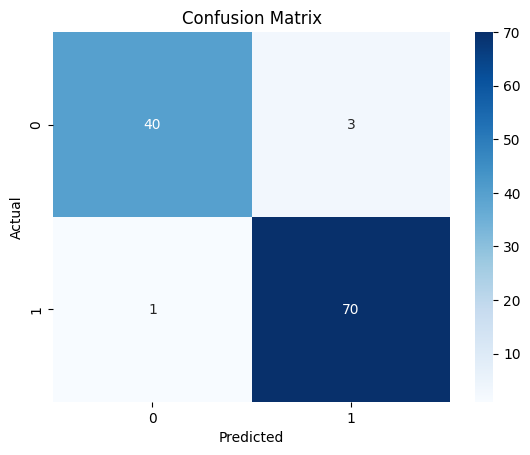

In [24]:
# 35. Train a Random Forest Classifier and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, rf_clf.predict(X_test))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('logreg', LogisticRegression(max_iter=1000, solver='liblinear'))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000, solver='liblinear'))
stacking_clf.fit(X_train, y_train)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking_clf.predict(X_test)))

Stacking Classifier Accuracy: 0.9649122807017544


In [26]:
# 37. Train a Random Forest Classifier and print the top 5 most important features
feature_importance = pd.DataFrame({'Feature': range(X.shape[1]), 'Importance': rf_clf.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importance.head())

    Feature  Importance
23       23    0.153892
27       27    0.144663
7         7    0.106210
20       20    0.077987
6         6    0.068001


In [27]:
# 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
y_pred = bagging_clf.predict(X_test)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-Score: 0.965034965034965


In [28]:
# 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
for depth in [5, 10, None]:
    rf_clf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_clf.fit(X_train, y_train)
    print(f"Max Depth {depth} Accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))

Max Depth 5 Accuracy: 0.9649122807017544
Max Depth 10 Accuracy: 0.9649122807017544
Max Depth None Accuracy: 0.9649122807017544


In [29]:
# 40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
from sklearn.neighbors import KNeighborsRegressor

for estimator in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    bagging_reg = BaggingRegressor(estimator=estimator, n_estimators=50, random_state=42)
    bagging_reg.fit(X_train, y_train)
    print(f"Bagging Regressor ({estimator.__class__.__name__}) MSE:", mean_squared_error(y_test, bagging_reg.predict(X_test)))

Bagging Regressor (DecisionTreeRegressor) MSE: 0.03357543859649123
Bagging Regressor (KNeighborsRegressor) MSE: 0.02909782456140351


In [30]:
# 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
y_probs = rf_clf.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))

ROC-AUC Score: 0.9952505732066819


In [31]:
# 42. Train a Bagging Classifier and evaluate its performance using cross-validation
scores = cross_val_score(bagging_clf, X, y, cv=5)
print("Cross-validation Accuracy:", scores.mean())

Cross-validation Accuracy: 0.9543859649122808


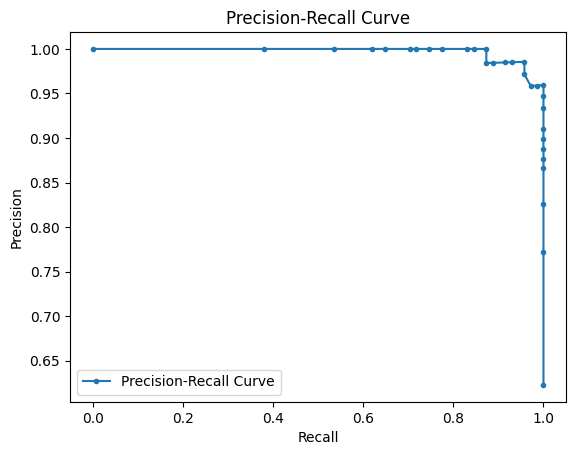

In [32]:
# 43. Train a Random Forest Classifier and plot the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [39]:
# 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000, solver='liblinear'))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000, solver='liblinear'))
stacking_clf.fit(X_train, y_train)
print("Stacking Classifier (RF & LogReg) Accuracy:", accuracy_score(y_test, stacking_clf.predict(X_test)))

Stacking Classifier (RF & LogReg) Accuracy: 0.956140350877193


In [34]:
# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance
for bootstrap in [True, False]:
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, bootstrap=bootstrap, random_state=42)
    bagging_reg.fit(X_train, y_train)
    print(f"Bagging Regressor (Bootstrap={bootstrap}) MSE:", mean_squared_error(y_test, bagging_reg.predict(X_test)))

Bagging Regressor (Bootstrap=True) MSE: 0.03357543859649123
Bagging Regressor (Bootstrap=False) MSE: 0.05620350877192982
